House_price_prediction

In [1]:
import numpy as np
import pandas as pd
from jinja2.utils import missing

In [2]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')


In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.shape

(1460, 81)

In [7]:
test_df.shape

(1459, 80)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [124]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [3]:
X_train=train_df.drop("SalePrice", axis=1)
y_train=train_df["SalePrice"]

In [4]:
X_test=test_df.copy()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

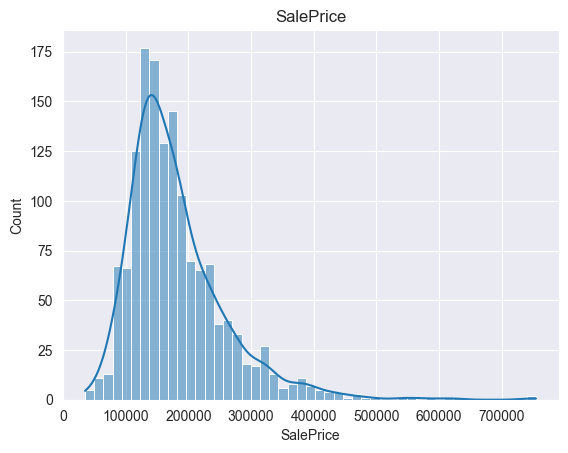

In [6]:
sns.histplot(y_train,kde=True)
plt.title("SalePrice")
plt.show()

In [7]:
import numpy as np
y_train_log=np.log1p(y_train)

In [152]:
num_cols=X_train.select_dtypes(include=["int64","float64"]).columns
cat_cols=X_train.select_dtypes(include=["object"]).columns

In [153]:
missing_percent=X_train.isnull().mean().sort_values(ascending=False)

In [154]:
missing_percent

Id              0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
               ... 
HouseAge        0.0
isRemodeled     0.0
LogGrLivArea    0.0
Qual_x_Area     0.0
HouseAgeSq      0.0
Length: 81, dtype: float64

In [ ]:
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
X_train.drop(drop_cols, axis=1, inplace=True)
X_test.drop(drop_cols, axis=1, inplace=True)


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 75, dtype: int64

In [25]:
X_train["LotArea"].skew()

np.float64(12.207687851233496)

In [155]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])




In [27]:
type(num_cols)

pandas.core.indexes.base.Index

In [156]:
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [29]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal


In [30]:
X_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [157]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown="ignore",sparse_output=False)
X_train_cat=encoder.fit_transform(X_train[cat_cols])
X_test_cat=encoder.transform(X_test[cat_cols])

In [158]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train[num_cols])
X_test_scaled=scaler.transform(X_test[num_cols])

In [159]:
import numpy as np
X_train_final=np.hstack((X_train_cat,X_train_scaled))
X_test_final=np.hstack((X_test_cat,X_test_scaled))

In [34]:
X_train_final.shape

(1460, 270)

In [35]:
X_test_final.shape

(1459, 270)

In [160]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val=train_test_split(X_train_final,y_train_log,test_size=0.2,random_state=42)

In [161]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_tr,y_tr)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [162]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_val)
rmse=np.sqrt(mean_squared_error(y_val,y_pred))

In [163]:
print(rmse)

0.12613940756175018


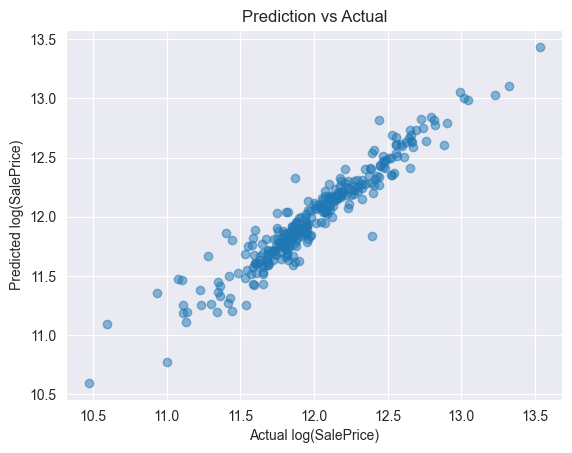

In [164]:
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual log(SalePrice)")
plt.ylabel("Predicted log(SalePrice)")
plt.title("Prediction vs Actual")
plt.show()


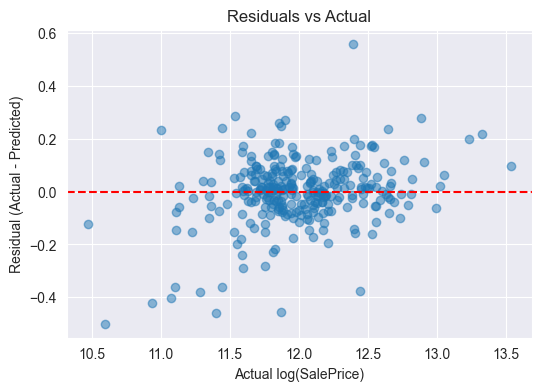

In [165]:
residuals = y_val - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_val, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Actual log(SalePrice)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual")
plt.show()


In [108]:
X_train_final

array([[ 0.        ,  0.        ,  0.        , ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [ 0.        ,  0.        ,  0.        , ..., -0.08768781,
        -0.48911005, -0.61443862],
       [ 0.        ,  0.        ,  0.        , ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  4.95311151,
        -0.48911005,  1.64520971],
       [ 0.        ,  0.        ,  0.        , ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [ 0.        ,  0.        ,  0.        , ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [166]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=1.0)
ridge.fit(X_tr,y_tr)
y_pred_ridge=ridge.predict(X_val)

rmse_ridge=np.sqrt(mean_squared_error(y_val,y_pred_ridge))

In [167]:
print(rmse_ridge)

0.12558406339197636


In [168]:
rmse_per=np.exp(rmse_ridge)-1
print(rmse_per*100)

13.38104769090631


In [170]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0005)
lasso.fit(X_tr,y_tr)
y_pred_lasso=lasso.predict(X_val)
rmse_lasso=np.sqrt(mean_squared_error(y_val,y_pred_lasso))
print(rmse_lasso)

0.12555679004185885


C:\Users\chinm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.630e-02, tolerance: 1.781e-02
  model = cd_fast.enet_coordinate_descent(


In [140]:
np.sum(lasso.coef_ == 0)


np.int64(163)

In [114]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,HouseAge,isRemodeled
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,2.0,2008.0,WD,Normal,2566.0,5.0,0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,5.0,2007.0,WD,Normal,2524.0,31.0,0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,9.0,2008.0,WD,Normal,2706.0,7.0,1
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,2473.0,91.0,1
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,12.0,2008.0,WD,Normal,3343.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,8.0,2007.0,WD,Normal,2600.0,8.0,1
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,2.0,2010.0,WD,Normal,3615.0,32.0,1
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,2500.0,5.0,2010.0,WD,Normal,3492.0,69.0,1
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,4.0,2010.0,WD,Normal,2156.0,60.0,1


In [115]:
X_train["TotalSF"]=(X_train["TotalBsmtSF"]+X_train["1stFlrSF"]+X_train["2ndFlrSF"])
X_test["TotalSF"]=(X_test["TotalBsmtSF"]+X_test["1stFlrSF"]+X_test["2ndFlrSF"])


In [95]:
X_train["HouseAge"]=X_train["YrSold"]-X_train["YearBuilt"]
X_test["HouseAge"]=X_test["YrSold"]-X_test["YearBuilt"]

In [96]:
X_train["isRemodeled"]=(X_train["YearRemodAdd"] != X_train["YearBuilt"]).astype(int)
X_test["isRemodeled"]=(X_test["YearRemodAdd"] != X_test["YearBuilt"]).astype(int)


In [171]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
regressor.fit(X_tr,y_tr)
y_pred_regressor=regressor.predict(X_val)
rmse_regression=np.sqrt(mean_squared_error(y_val,y_pred_regressor))
print(rmse_regression)

0.15011700008585938


In [172]:
def plot_residuals(y_val, y_pred_regressor, title):
    residuals_1 = y_val - y_pred_regressor
    plt.figure(figsize=(6,4))
    plt.scatter(y_val, residuals, alpha=0.4)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(title)
    plt.xlabel("Actual log(SalePrice)")
    plt.ylabel("Residual")
    plt.show()


In [118]:
X_train[["TotalSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]].corr()


,TotalSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
TotalSF,1.000000,0.826742,0.800350,0.342733
TotalBsmtSF,0.826742,1.000000,0.819530,-0.174512
1stFlrSF,0.800350,0.819530,1.000000,-0.202646
2ndFlrSF,0.342733,-0.174512,-0.202646,1.000000


In [192]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.0005,l1_ratio=0.5,max_iter=30000,random_state=42)
elastic.fit(X_tr,y_tr)
y_pred_elastic=elastic.predict(X_val)
rmse_elastic=np.sqrt(mean_squared_error(y_val,y_pred_elastic))
print(rmse_elastic)

0.12293411099495448


In [144]:
np.sum(elastic.coef_ == 0)

np.int64(128)

In [121]:
X_train["LogGrLivArea"]=np.log1p(X_train["GrLivArea"])
X_test["LogGrLivArea"]=np.log1p(X_test["GrLivArea"])

In [145]:
intuition=np.exp(0.12447) - 1
print(intuition*100)


13.25480435092883


In [146]:
X_train["GrLivArea"].skew()

np.float64(1.3665603560164552)

In [147]:
X_train["GrLivArea"]=np.log1p(X_train["GrLivArea"])

In [148]:
X_test["GrLivArea"]=np.log1p(X_test["GrLivArea"])

In [149]:
X_train["Qual_x_Area"]=X_train["OverallQual"]*X_train["GrLivArea"]
X_test["Qual_x_Area"]=X_test["OverallQual"]*X_train["GrLivArea"]

In [150]:
X_train["HouseAgeSq"]=X_train["HouseAge"]**2
X_test["HouseAgeSq"]=X_test["HouseAge"]**2

In [184]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
for depth in[3,4,5,6]:

    xgb=XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=depth,subsample=0.8,colsample_bytree=0.8,objective='reg:squarederror',random_state=42,n_jobs=-1)
    xgb.fit(X_tr,y_tr)
    y_pred_xgb=xgb.predict(X_val)
    rmse_xgb=np.sqrt(mean_squared_error(y_val,y_pred_xgb))
    print(f"depth={depth},rmse={rmse_xgb}")

depth=3,rmse=0.12861882296768903
depth=4,rmse=0.13097805304709875
depth=5,rmse=0.13542161147959766
depth=6,rmse=0.13698928651703582


In [186]:
configs = [
    (0.1, 300),
    (0.05, 800),
    (0.03, 1200)
]
for lr, n_est in configs:
    xgb = XGBRegressor(
        n_estimators=n_est,
        learning_rate=lr,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )
    xgb.fit(X_tr, y_tr)
    rmse = np.sqrt(mean_squared_error(y_val, xgb.predict(X_val)))
    print(f"lr={lr}, trees={n_est}, rmse={rmse}")


lr=0.1, trees=300, rmse=0.13126362851500495
lr=0.05, trees=800, rmse=0.1281798256895241
lr=0.03, trees=1200, rmse=0.12908194998955205


In [187]:
for subs in [0.6, 0.8, 1.0]:
    xgb = XGBRegressor(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=4,
        subsample=subs,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )
    xgb.fit(X_tr, y_tr)
    rmse = np.sqrt(mean_squared_error(y_val, xgb.predict(X_val)))
    print(f"subsample={subs}, rmse={rmse}")


subsample=0.6, rmse=0.1312399225811541
subsample=0.8, rmse=0.13058965092596964
subsample=1.0, rmse=0.1370763384042472


In [193]:
test_preds_log=elastic.predict(X_test_final)
test_preds=np.expm1(test_preds_log)

In [195]:
submission=pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_preds
})
submission.to_csv("submission.csv",index=False)
